<a href="https://colab.research.google.com/github/rajasekaran12345/onemadAI/blob/main/LINEARREGRESSION_housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#converting csv file to dataframe
data=pd.read_csv("https://raw.githubusercontent.com/connectaditya/House-price-prediction/master/USA_Housing.csv")

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
#deleting the address column
del data['Address']

In [5]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


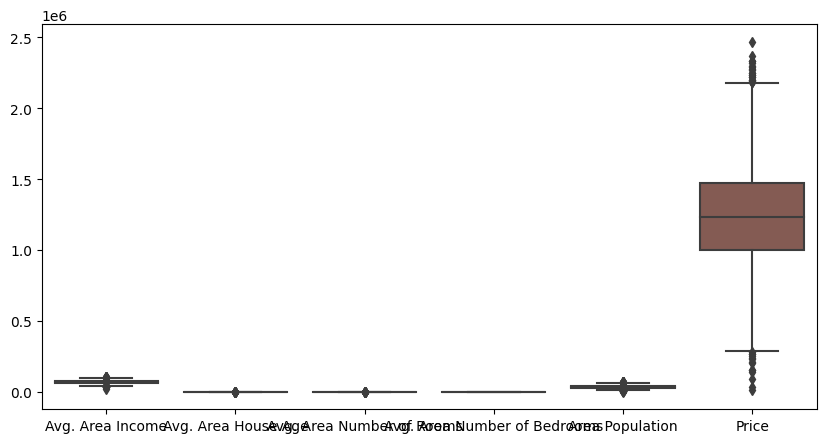

In [8]:
fig=plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

In [9]:
#importing standard scaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [10]:
#initializing standardscaler
ss=StandardScaler()
data_s=ss.fit_transform(data)

In [11]:
data_df=pd.DataFrame(data_s,columns=data.columns)

In [12]:
data_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.028660,-0.296927,0.021274,0.088062,-1.317599,-0.490081
1,1.000808,0.025902,-0.255506,-0.722301,0.403999,0.775508
2,-0.684629,-0.112303,1.516243,0.930840,0.072410,-0.490211
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734,0.080843
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387,-1.702518


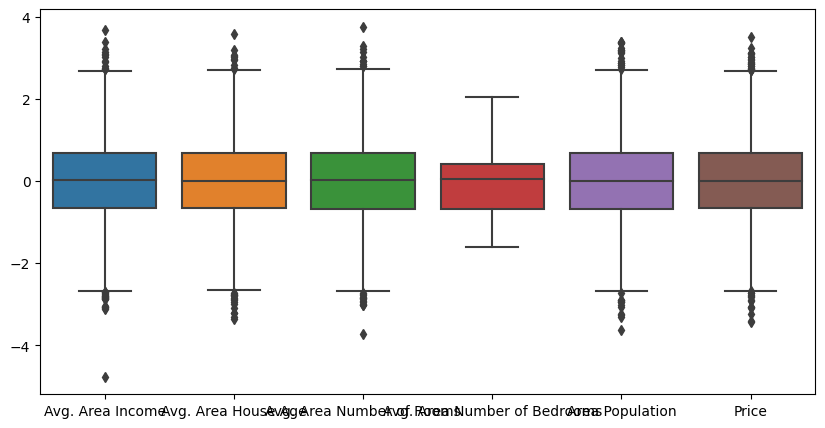

In [13]:
#visualizing the scaled data withboxplot
fig=plt.figure(figsize=(10,5))
sns.boxplot(data=data_df)
plt.show()

In [14]:
#importing train_test_split,and linear_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
x=data_df.drop('Price',axis=1)

In [16]:
#seperating train data and test data
x_train,x_test,y_train,y_test=train_test_split(x,data_df.Price,test_size=0.2)

In [17]:
x_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2895,-1.111836,0.183465,1.285244,0.258239,-0.824335
1919,0.901483,-1.048990,-0.481426,-0.430571,-0.089061
2375,0.257073,0.333960,-0.498528,-1.224727,-1.029242
1369,0.261883,-0.515326,0.116153,1.084810,1.546258
2030,-0.063438,-0.555183,-1.334682,-1.394903,-0.593991


<Axes: xlabel='Area Population', ylabel='Count'>

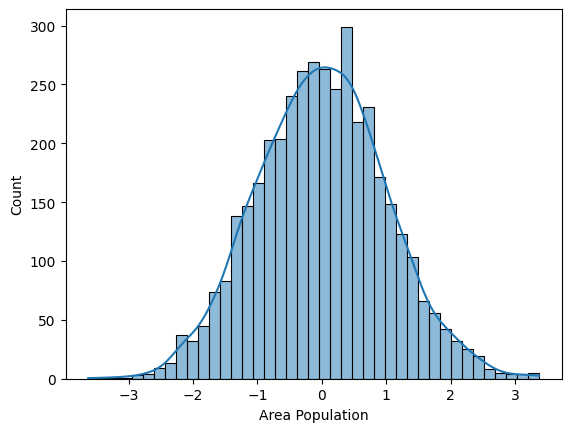

In [18]:
sns.histplot(x_train['Area Population'],kde=True)

In [19]:
#initializing linear_regression model,training our model.
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
#finding the accuracy of our model
model.score(x_test,y_test)

0.9192750236321342

In [21]:
#importing mean squared error from sklearn.metrics
from sklearn.metrics import mean_squared_error

In [22]:
y_pred=model.predict(x_test)

In [23]:
#finding the error percentage of our model
rmse=mean_squared_error(y_test,y_pred,squared=False)

In [24]:
rmse

0.2838079121686127

In [25]:
#slope coefficients of our model
model.coef_

array([0.65123035, 0.46603561, 0.34253052, 0.0037476 , 0.42660927])

In [26]:
#intercept value of our model
model.intercept_

-0.00032989576925879357

In [27]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [28]:
#manualy predicting the house price
manual_prediction=model.predict([[79643,10,4,2,55000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
#price of the user data
manual_prediction

array([75335.48610404])